In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.special import kn
from scipy.optimize import minimize
import galkin
import galkin.processdata   # routines to process kinematic data
import galkin.readparsFile  # routines to read and check input parameters
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#10.3, 15.3, 7.7from the paper
# Galactic parameters
R0=8.0# Galactocentric distance (kpc)
V0=230.# local circular velocity (km/s)
UsunINUSE=11.10# solar motion in the U-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
VsunINUSE=12.24# solar motion in the V-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
WsunINUSE=07.25# solar motion in the W-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
SYSTDISP=0.# systematic dispersion due to spiral arm streaming (km/s)

In [3]:
# Flags
flagPROPERMOTIONS=0	 			# proper motions not supported in current version - please keep at 0
flagHITERMINAL=0				# whether to use HI terminal velocities
flagFich89tab2=0				# whether to use Fich+ '89, ApJ 342, 272 (1989) (Table 2)
flagMalhotra95=0				# whether to use Malhotra '95, ApJ 448, 138 (1995)
flagMcClureGriffithsDickey07=0			# whether to use McClure-Griffiths & Dickey '07, ApJ 671, 427 (2007)
flagHITHICKNESS=0				# whether to use the HI thickness method
flagHonmaSofue97=0				# whether to use Honma & Sofue '97, PASJ 49, 453 (1997)
flagCOTERMINAL=1				# whether to use CO terminal velocities
flagBurtonGordon78=0				# whether to use Burton & Gordon '78, A&A 63, 7 (1978)
flagClemens85=0					# whether to use Clemens '85, ApJ 295, 422 (1985)
flagKnapp85=1					# whether to use Knapp+ '85, AJ 90, 2 (1985)
flagLuna06=0					# whether to use Luna+ '06, ApJ 641, 938 (2006)
flagHIIREGIONS=1				# whether to use HII regions
flagBlitz79=0					# whether to use Blitz '79, ApJL 231, L115 (1979)
flagFich89tab1=0				# whether to use Fich+ '89, ApJ 342, 272 (1989) (Table 1)	
flagTurbideMoffat93=0				# whether to use Turbide & Moffat '93, AJ 105, 5 (1993)
flagBrandBlitz93=0				# whether to use Brand & Blitz '93, A&A 275, 67 (1993)
flagHou09tabA1=1				# whether to use Hou+ '09, A&A 499, 473 (2009) (Table A1)
flagGMC=0					# whether to use giant molecular clouds
flagHou09tabA2=0				# whether to use Hou+ '09, A&A 499, 473 (2009) (Table A2)
##
flagOPENCLUSTERS=0				# whether to use open clusters
flagFrinchaboyMajewski08=0			# whether to use Frinchaboy & Majewski '08, AJ 136, 118 (2008)
flagPLANETARYNEBULAE=0				# whether to use planetary nebulae
flagDurand98=0					# whether to use Durand+ '98, A&AS 132, 13 (1998)
flagCEPHEIDS=1					# whether to use classical cepheids
flagPont94=1					# whether to use Pont+ '94, A&A 285, 415 (1994)
flagPont97=0					# whether to use Pont+ '97, A&A 318, 416 (1997)
flagCSTARS=0					# whether to use carbon stars
flagDemersBattinelli07=0			# whether to use Demers & Battinelli '07, A&A 473, 143 (2007)
flagBattinelli12=0				# whether to use Battinelli+ '12, Ap 56, 68 (2013)
###
flagMASERS=0					# whether to use masers
flagReid14=0					# whether to use Reid+ '14, ApJ 783, 130 (2014)
flagHonma12=0					# whether to use Honma+ '12, PASJ 64, 136 (2012)
flagStepanishchevBobylev11=0			# whether to use Stepanishchev & Bobylev '11, AstL 37, 4 (2011)
flagXu13=0					# whether to use Xu+ '13, ApJ 769, 15 (2013)
flagBobylevBajkova13=0				# whether to use Bobylev & Bajkova '13, AstL 39, 809 (2013)
##
flagastropy=0				 	# whether to use astropy for equatorial-to-galactic conversions

In [4]:
inputpars=(R0,V0,UsunINUSE,VsunINUSE,WsunINUSE,SYSTDISP, flagPROPERMOTIONS,flagHITERMINAL,flagFich89tab2,flagMalhotra95,flagMcClureGriffithsDickey07, flagHITHICKNESS,flagHonmaSofue97,flagCOTERMINAL,flagBurtonGordon78,flagClemens85,flagKnapp85,flagLuna06, flagHIIREGIONS,flagBlitz79,flagFich89tab1,flagTurbideMoffat93,flagBrandBlitz93,flagHou09tabA1, flagGMC,flagHou09tabA2,flagOPENCLUSTERS,flagFrinchaboyMajewski08,flagPLANETARYNEBULAE,flagDurand98,flagCEPHEIDS,flagPont94,flagPont97, flagCSTARS,flagDemersBattinelli07,flagBattinelli12, flagMASERS,flagReid14,flagHonma12,flagStepanishchevBobylev11,flagXu13,flagBobylevBajkova13,flagastropy)

In [5]:
galkin.readparsFile.CheckAndPrintParameters(inputpars)

checking validity of input parameters...
printing input parameters...
 R0=  8.0  kpc
 V0=  230.0  km/s
 (Usun,Vsun,Wsun) = ( 11.1 , 12.24 , 7.25 ) km/s
 systematic dispersion =  0.0  km/s
 use HI terminal velocities?            0
 use HI thickness method?               0
 use CO terminal velocities?            1
  use Burton & Gordon 78?                 0
  use Clemens 85?                         0
  use Knapp+ 85?                          1
  use Luna+ 06?                           0
 use HII regions?                       1
  use Blitz 79?                           0
  use Fich+ 89 (Table 1)?                 0
  use Turbide & Moffat 93?                0
  use Brand & Blitz 93?                   0
  use Hou+ 09 (Table A1)?                 1
 use giant molecular clouds?            0
 use open clusters?                     0
 use planetary nebulae?                 0
 use cepheids?                          1
  use Pont+ 94?                           1
  use Pont+ 97?                     

In [6]:
vecout=galkin.processdata.ProcessData(inputpars)
totallistvc=vecout[0]

processing CO terminal velocities...
 processing Knapp+ 85...
  selected  37  CO terminal velocities
processing HII regions...
 processing Hou+ 09 (Table A1)...
  selected  316  out of the total sample of  815  HII regions
processing classical cepheids...
 processing Pont+ 94...
  selected  245  out of the total sample of  278  cepheids


In [7]:
vecRp    = np.array([row[0] for row in totallistvc])# galactocentric distance [kpc]
vecerrRp = np.array([row[1] for row in totallistvc])# error in galactocentric distance [kpc]
vecvRp   = np.array([row[2] for row in totallistvc])# rotation velocity [km/s]
vecerrvRp= np.array([row[3] for row in totallistvc])# error in rotation velocity [km/s]

In [8]:
rho_soliton = 2.42e9#SM*kpc−3
m_axion = 2.44e-22#eV
#Constants
G = 4.302e-6#kpc/SM(km/s)^2
q_b = 0.6
r_b = 1.9#kpc
a_b = 1.#kpc
q_h = 0.8
alpha_b = 1.8
R_m = 4.#kpc
#parameters model I
rho_b_I = 0.427e9#sM/kpc^3
a_h_I = 3.83#kpc
rho_h_I = 0.711e9#SM/kpc^3
alpha_h_I = -2.
beta_h_I = 2.96
R_d_I = 2.0#kpc
R_d_II = 3.2#kpc
Sigma_d_SD_I = (1905.0e6)*0.75#SM/kpc^2
Sigma_g_ISM_I = (1905.0e6)*0.25#SM/kpc^2
#parameters model II
rho_b_II = 0.3e9#sM/kpc^3
a_h_II = 1.9#kpc
rho_h_II = 0.266e9#SM/kpc^3
alpha_h_II = 1.63
beta_h_II = 2.17
R_d_II = 3.2#kpc
Sigma_d_SD_II = (536.0e6)*0.75#SM/kpc^2
Sigma_g_ISM_II = (536.0e6)*0.25#SM/kpc^2

In [9]:
def Vc2_b(R,rho_b,q_b=q_b,alpha_b=alpha_b,r_b=r_b,a_b=a_b):
    def I_b(x,R):
        e = np.sqrt(1. - q_b**2.)
        n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
        d = np.sqrt(1.-x**2.*e**2.)
        t = R**2.*(R/a_b)**(-alpha_b)
        return (t*n)/d
    Rx = R.reshape(-1, 1)
    yp = np.linspace(0.,1.,100).reshape(1,-1)#integration limits
    dx = yp[0,1] - yp[0,0]
    fun = I_b(yp,Rx)
    res_int = integrate.simps(fun,dx=dx)
    return 4.*np.pi*G*q_b*rho_b*res_int

In [10]:
Vc2_b_I = Vc2_b(vecRp,rho_b=rho_b_I)
Vc2_b_II = Vc2_b(vecRp,rho_b=rho_b_II)

In [11]:
 def Vc2_DM(R,a_h,rho_h,alpha_h,beta_h,q_h=q_h):
    def I_h(x,R):
        e = np.sqrt(1.- q_h**2.)
        n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
        d = np.sqrt(1-x**2.*e**2)
        t = R**2.*(R/a_h)**(-alpha_h)
        result = (t*n)/d
        return result
    Rx = R.reshape(-1, 1)
    yp = np.linspace(0.,1.,100).reshape(1,-1)#integration limits
    dx = yp[0,1] - yp[0,0]
    fun = I_h(yp,Rx)
    res_int = integrate.simps(fun,dx=dx)
    return 4.*np.pi*G*q_h*rho_h*res_int

In [12]:
Vc2_DM_I = Vc2_DM(vecRp,a_h_I,rho_h_I,alpha_h_I,beta_h_I)
Vc2_DM_II = Vc2_DM(vecRp,a_h_II,rho_h_II,alpha_h_II,beta_h_II)

In [13]:
def Vc2_SD_simps(R,R_d,Sigma_d_SD,z=0.,alpha_0=0.5,z1=1.,z0=0.3):
    def I_SD(zp,a,R):
        d = np.sqrt((a+R)**2. + (z-zp)**2.) + np.sqrt((a-R)**2. + (z-zp)**2.)
        u = (2.*a)/d
        t2 = u/np.sqrt(1-u**2.)
        t1 = (a+R)/(np.sqrt((a+R)**2. + (z-zp)**2.)) - (a-R)/(np.sqrt((a-R)**2. + (z-zp)**2.))
        g = -a*kn(0,a/R_d)*t2*t1/d
        f = (alpha_0*np.exp(-abs(zp)/z0))/(2.*z0) + np.exp(-abs(zp)/z1)/(2.*z1) - (alpha_0*np.exp(-abs(zp)/z1))/(2.*z1)
        return R*f*g
    Integral_SD_sims = []
    a_lims = np.linspace(0.1, 15.0,len(R))
    zp_lims = np.linspace(-15.0,15.0,len(R))
    fun_zp = np.zeros(len(R))
    for k in range(0,len(R)):
        for i in range(0,len(R)):
            fun_zp[i] = integrate.simps(I_SD(zp_lims[i],a_lims,R[k]),a_lims)
        result = integrate.simps(fun_zp,zp_lims)
        Integral_SD_sims.append(result)
    return -4.*G*Sigma_d_SD*np.array(Integral_SD_sims)/R_d

In [14]:
Vc2_SD_I=Vc2_SD_simps(vecRp,R_d_I,Sigma_d_SD_I)
Vc2_SD_II=Vc2_SD_simps(vecRp,R_d_II,Sigma_d_SD_II)

In [15]:
def Vc2_ISM(R,R_d,Sigma_g_ISM,R_m=R_m):
    def M_g_ISM(u,R):
        return R*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))
    Integral_M_g = []
    for i in range (0,len(R)):
        result = integrate.quad(M_g_ISM,0,1,args=(R[i]))[0]
        Integral_M_g.append(result)
    return 2.*np.pi*Sigma_g_ISM*G*np.array(Integral_M_g)

In [16]:
Vc2_ISM_I=Vc2_ISM(vecRp,R_d_I,Sigma_g_ISM_I)
Vc2_ISM_II=Vc2_ISM(vecRp,R_d_II,Sigma_g_ISM_II)

In [17]:
Vc_tot_I = np.sqrt(Vc2_b_I + Vc2_DM_I + Vc2_SD_I + Vc2_ISM_I)
Vc_tot_II = np.sqrt(Vc2_b_II + Vc2_DM_II + Vc2_SD_II + Vc2_ISM_II)

# Un solo parámetro del modelo

$\rho_{b}$

In [18]:
def Vc_tot_rho_b_I(R,param):
    rho_b = param
    suma = Vc2_b(R,rho_b) + Vc2_DM_I + Vc2_SD_I + Vc2_ISM_I
    return np.sqrt(suma)

In [19]:
def Vc_tot_rho_b_II(R,param):
    rho_b = param
    suma = Vc2_b(R,rho_b) + Vc2_DM_II + Vc2_SD_II + Vc2_ISM_II
    return np.sqrt(suma)

In [20]:
#def Vc_tot_rho_b_I(R,param,params):
#    rho_b = param
#    a_h,rho_h,alpha_h,beta_h,R_d,Sigma_d_SD,Sigma_g_ISM = params 
#    suma = Vc2_b(R,rho_b) + Vc2_DM(R,a_h,rho_h,alpha_h,beta_h) + Vc2_SD_simps(R,R_d,Sigma_d_SD) + Vc2_ISM(R,R_d,Sigma_g_ISM)
#    return np.sqrt(suma)

In [25]:
def Xi2_rho_b_I(parameters):
    rho_b = np.exp(parameters)
    model = Vc_tot_rho_b_I(vecRp,rho_b)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [26]:
def Xi2_rho_b_II(parameters):
    rho_b = np.exp(parameters)
    model = Vc_tot_rho_b_II(vecRp,rho_b)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [27]:
x0_rho_b = np.array(np.log(1.0e8))
LS_rho_b_I = minimize(Xi2_rho_b_I,x0_rho_b,method='L-BFGS-B',bounds=((np.log(1.0e8),np.log(30.0e8)),))
print LS_rho_b_I

      fun: 2330.5099908761063
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.0003638])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 14
      nit: 3
   status: 0
  success: True
        x: array([20.98647195])


In [28]:
LS_rho_b_II = minimize(Xi2_rho_b_II,x0_rho_b,method='L-BFGS-B',bounds=((np.log(1.0e8),np.log(30.0e8)),))
print LS_rho_b_II

      fun: 2681.270120762674
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.0001819])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 18
      nit: 5
   status: 0
  success: True
        x: array([20.7099686])


In [29]:
print np.exp(LS_rho_b_I.x),np.exp(LS_rho_b_II.x)

[1.30109486e+09] [9.86790777e+08]


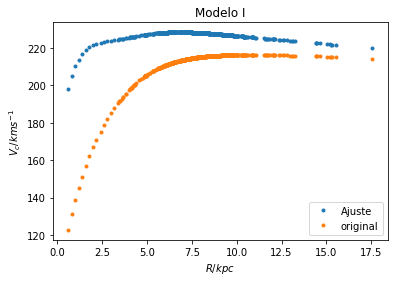

In [30]:
plt.plot(vecRp,Vc_tot_rho_b_I(vecRp,np.asscalar(np.exp(LS_rho_b_I.x))),'.',label='Ajuste')
plt.plot(vecRp,Vc_tot_I,'.',label='original')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('Modelo I')
plt.legend(loc='lower right', prop={'size':10})
plt.savefig('Fit_rho_b_I.pdf')

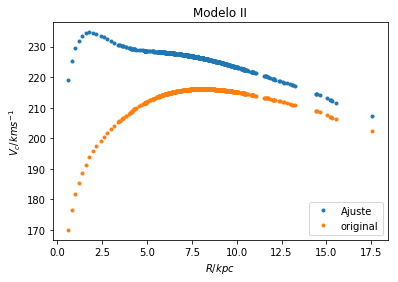

In [31]:
plt.plot(vecRp,Vc_tot_rho_b_II(vecRp,np.asscalar(np.exp(LS_rho_b_II.x))),'.',label='Ajuste')
plt.plot(vecRp,Vc_tot_II,'.',label='original')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('Modelo II')
plt.legend(loc='lower right', prop={'size':10})
plt.savefig('Fit_rho_b_II.pdf')

$a_{h}$

In [32]:
def Vc_tot_a_h_I(R,param):
    a_h = param
    suma = Vc2_b_I + Vc2_DM(R,a_h,rho_h_I,alpha_h_I,beta_h_I) + Vc2_SD_I + Vc2_ISM_I
    return np.sqrt(suma)

In [33]:
def Vc_tot_a_h_II(R,param):
    a_h = param
    suma = Vc2_b_II + Vc2_DM(R,a_h,rho_h_II,alpha_h_II,beta_h_II) + Vc2_SD_II + Vc2_ISM_II
    return np.sqrt(suma)

In [34]:
def Xi2_a_hI(parameters):
    a_h = parameters
    model = Vc_tot_a_h_I(vecRp,a_h)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [35]:
def Xi2_a_hII(parameters):
    a_h = parameters
    model = Vc_tot_a_h_II(vecRp,a_h)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [36]:
x0_a_h = np.array(1.0)
LS_a_h_I = minimize(Xi2_a_hI,x0_a_h,method='L-BFGS-B',bounds=((1.0,9.),))
print LS_a_h_I

      fun: 4656.750683819073
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 18
      nit: 5
   status: 0
  success: True
        x: array([5.71212142])


In [37]:
LS_a_h_II = minimize(Xi2_a_hII,x0_a_h,method='L-BFGS-B',bounds=((1.0,9.),))
print LS_a_h_II

      fun: 2266.942281435001
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.54747351e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 16
      nit: 6
   status: 0
  success: True
        x: array([2.0898071])


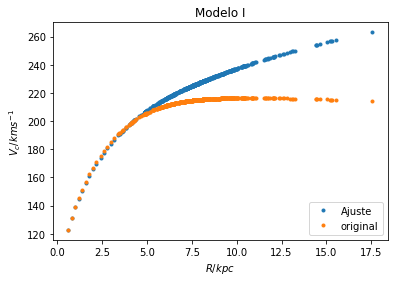

In [38]:
plt.plot(vecRp,Vc_tot_a_h_I(vecRp,np.asscalar(LS_a_h_I.x)),'.',label='Ajuste')
plt.plot(vecRp,Vc_tot_I,'.',label='original')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('Modelo I')
plt.legend(loc='lower right', prop={'size':10})
plt.savefig('Fit_a_h_I.pdf')

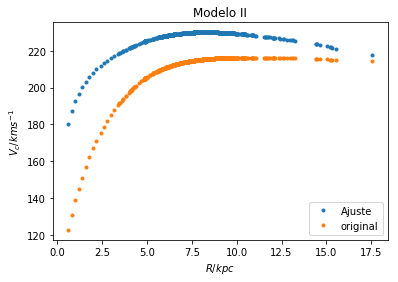

In [39]:
plt.plot(vecRp,Vc_tot_a_h_II(vecRp,np.asscalar(LS_a_h_II.x)),'.',label='Ajuste')
plt.plot(vecRp,Vc_tot_I,'.',label='original')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('Modelo II')
plt.legend(loc='lower right', prop={'size':10})
plt.savefig('Fit_a_h_II.pdf')

$\rho_{h}$

In [49]:
def Vc_tot_rho_h_I(R,param):
    rho_h = param
    suma = Vc2_b_I + Vc2_DM(R,a_h_I,rho_h,alpha_h_I,beta_h_I) + Vc2_SD_I + Vc2_ISM_I
    return np.sqrt(suma)

In [56]:
def Vc_tot_rho_h_II(R,param):
    rho_h = param
    suma = Vc2_b_II + Vc2_DM(R,a_h_II,rho_h,alpha_h_II,beta_h_II) + Vc2_SD_II + Vc2_ISM_II
    return np.sqrt(suma)

In [57]:
def Xi2_rho_h_I(parameters):
    rho_h = np.exp(parameters)
    model = Vc_tot_rho_h_I(vecRp,rho_h)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [58]:
def Xi2_rho_h_II(parameters):
    rho_h = np.exp(parameters)
    model = Vc_tot_rho_h_II(vecRp,rho_h)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [59]:
x0_rho_h = np.array(np.log(1.0e8))
LS_rho_h_I = minimize(Xi2_rho_h_I,x0_rho_h,method='L-BFGS-B',bounds=((np.log(1.0e8),np.log(20.0e8)),))
print LS_rho_h_I

      fun: 3481.3481004159257
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00163709])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 16
      nit: 3
   status: 0
  success: True
        x: array([20.74110992])


In [60]:
LS_rho_h_II = minimize(Xi2_rho_h_II,x0_rho_h,method='L-BFGS-B',bounds=((np.log(1.0e8),np.log(20.0e8)),))
print LS_rho_h_II

      fun: 2262.254355845996
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00040927])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 16
      nit: 5
   status: 0
  success: True
        x: array([19.58533238])


In [61]:
print np.exp(LS_rho_h_I.x),np.exp(LS_rho_h_II.x)

[1.01800424e+09] [3.20480626e+08]


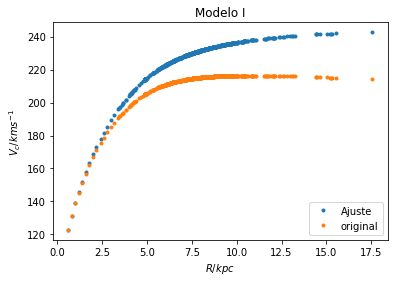

In [62]:
plt.plot(vecRp,Vc_tot_rho_h_I(vecRp,np.asscalar(np.exp(LS_rho_h_I.x))),'.',label='Ajuste')
plt.plot(vecRp,Vc_tot_I,'.',label='original')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('Modelo I')
plt.legend(loc='lower right', prop={'size':10})
plt.savefig('Fit_rho_h_I.pdf')

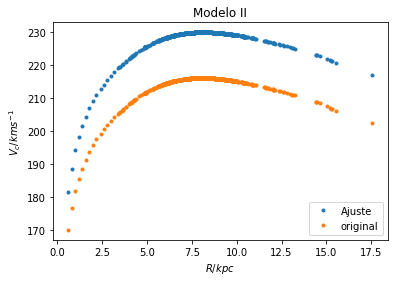

In [63]:
plt.plot(vecRp,Vc_tot_rho_h_II(vecRp,np.asscalar(np.exp(LS_rho_h_II.x))),'.',label='Ajuste')
plt.plot(vecRp,Vc_tot_II,'.',label='original')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('Modelo II')
plt.legend(loc='lower right', prop={'size':10})
plt.savefig('Fit_rho_h_II.pdf')

$\alpha_{h}$

In [64]:
def Vc_tot_alpha_h_I(R,param):
    alpha_h = param
    suma = Vc2_b_I + Vc2_DM(R,a_h_I,rho_h_I,alpha_h,beta_h_I) + Vc2_SD_I + Vc2_ISM_I
    return np.sqrt(suma)

In [65]:
def Vc_tot_alpha_h_II(R,param):
    alpha_h = param
    suma = Vc2_b_II + Vc2_DM(R,a_h_II,rho_h_II,alpha_h,beta_h_II) + Vc2_SD_II + Vc2_ISM_II
    return np.sqrt(suma)

In [66]:
def Xi2_alpha_h_I(parameters):
    alpha_h = parameters
    model = Vc_tot_alpha_h_I(vecRp,alpha_h)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [75]:
def Xi2_alpha_h_II(parameters):
    alpha_h = parameters
    model = Vc_tot_alpha_h_II(vecRp,alpha_h)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [70]:
x0_alpha_h = np.array(-3.)
LS_alpha_h_I = minimize(Xi2_alpha_h_I,x0_alpha_h,method='TNC',bounds=((-3.,3.),))
print LS_alpha_h_I

     fun: 3051.261701021752
     jac: array([-9.09494702e-05])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 18
     nit: 6
  status: 1
 success: True
       x: array([-1.34313742])


In [76]:
x0_alpha_h_II = np.array(-10.)
LS_alpha_h_II = minimize(Xi2_alpha_h_II,x0_alpha_h,method='TNC',bounds=((-3.,3.),))
print LS_alpha_h_II

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.


     fun: 123549.78104984072
     jac: array([-15441.71391288])
 message: 'Linear search failed'
    nfev: 66
     nit: 0
  status: 4
 success: False
       x: array([-3.])


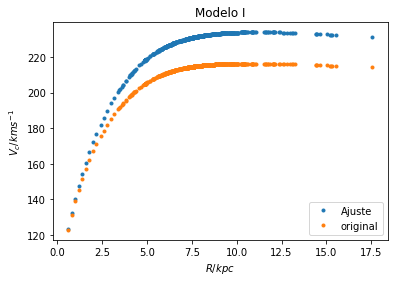

In [77]:
plt.plot(vecRp,Vc_tot_alpha_h_I(vecRp,np.asscalar(LS_alpha_h_I.x)),'.',label='Ajuste')
plt.plot(vecRp,Vc_tot_I,'.',label='original')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('Modelo I')
plt.legend(loc='lower right', prop={'size':10})
plt.savefig('Fit_alpha_h_I.pdf')

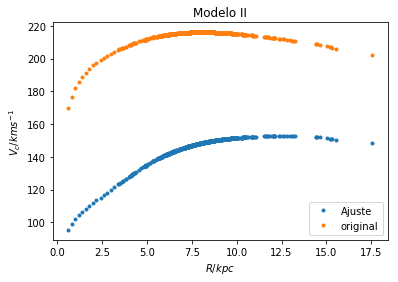

In [78]:
plt.plot(vecRp,Vc_tot_alpha_h_II(vecRp,np.asscalar(LS_alpha_h_II.x)),'.',label='Ajuste')
plt.plot(vecRp,Vc_tot_II,'.',label='original')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('Modelo II')
plt.legend(loc='lower right', prop={'size':10})
plt.savefig('Fit_alpha_h_II.pdf')

$\beta_{h}$

In [79]:
def Vc_tot_beta_h_I(R,param):
    beta_h = param
    suma = Vc2_b_I + Vc2_DM(R,a_h_I,rho_h_I,alpha_h_I,beta_h) + Vc2_SD_I + Vc2_ISM_I
    return np.sqrt(suma)

In [80]:
def Vc_tot_beta_h_II(R,param):
    beta_h = param
    suma = Vc2_b_II + Vc2_DM(R,a_h_II,rho_h_II,alpha_h_II,beta_h) + Vc2_SD_II + Vc2_ISM_II
    return np.sqrt(suma)

In [84]:
def Xi2_beta_h_I(parameters):
    beta_h = parameters
    model = Vc_tot_beta_h_I(vecRp,beta_h)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [88]:
def Xi2_beta_h_II(parameters):
    beta_h = parameters
    model = Vc_tot_beta_h_II(vecRp,beta_h)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [86]:
x0_beta_h = np.array(1.)
LS_beta_h_I = minimize(Xi2_beta_h_I,x0_beta_h,method='L-BFGS-B',bounds=((1.,3.),))
print LS_beta_h_I

      fun: 3882.201546383615
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.0003638])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 18
      nit: 7
   status: 0
  success: True
        x: array([2.58140777])


In [89]:
LS_beta_h_II = minimize(Xi2_beta_h_II,x0_beta_h,method='L-BFGS-B',bounds=((1.,3.),))
print LS_beta_h_II

      fun: 2367.086155154032
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 24
      nit: 8
   status: 0
  success: True
        x: array([1.99731338])


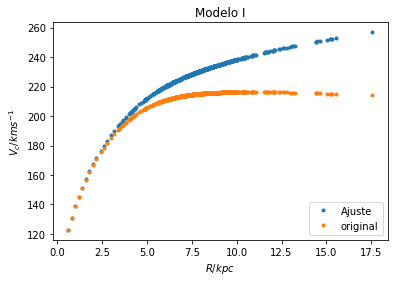

In [90]:
plt.plot(vecRp,Vc_tot_beta_h_I(vecRp,np.asscalar(LS_beta_h_I.x)),'.',label='Ajuste')
plt.plot(vecRp,Vc_tot_I,'.',label='original')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('Modelo I')
plt.legend(loc='lower right', prop={'size':10})
plt.savefig('Fit_beta_h_I.pdf')

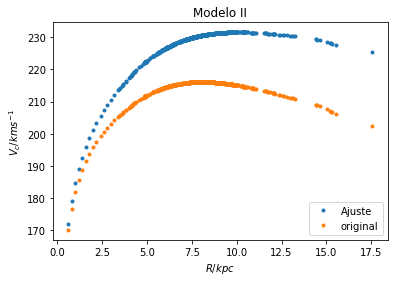

In [91]:
plt.plot(vecRp,Vc_tot_beta_h_II(vecRp,np.asscalar(LS_beta_h_II.x)),'.',label='Ajuste')
plt.plot(vecRp,Vc_tot_II,'.',label='original')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('Modelo II')
plt.legend(loc='lower right', prop={'size':10})
plt.savefig('Fit_beta_h_II.pdf')

$R_{d}$

In [92]:
def Vc_tot_R_d_I(R,param):
    R_d = param
    suma = Vc2_b_I + Vc2_DM_I + Vc2_SD_simps(R,R_d,Sigma_d_SD_I) + Vc2_ISM(R,R_d,Sigma_g_ISM_I)
    return np.sqrt(suma)

In [93]:
def Vc_tot_R_d_II(R,param):
    R_d = param
    suma = Vc2_b_II + Vc2_DM_II + Vc2_SD_simps(R,R_d,Sigma_d_SD_II) + Vc2_ISM(R,R_d,Sigma_g_ISM_II)
    return np.sqrt(suma)

In [94]:
def Xi2_R_d_I(parameters):
    R_d = parameters
    model = Vc_tot_R_d_I(vecRp,R_d)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [95]:
def Xi2_R_d_II(parameters):
    R_d = parameters
    model = Vc_tot_R_d_II(vecRp,R_d)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [96]:
x0_R_d = np.array(1.0)
LS_R_d_I = minimize(Xi2_R_d_I,x0_R_d,method='L-BFGS-B',bounds=((1.0,4.),))
print LS_R_d_I

      fun: 3179.35755550916
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([4.54747351e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 22
      nit: 8
   status: 0
  success: True
        x: array([2.32916685])


In [101]:
LS_R_d_II = minimize(Xi2_R_d_II,x0_R_d,method='L-BFGS-B',bounds=((1.0,7.),))
print LS_R_d_II

      fun: 2712.3996983165016
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 22
      nit: 6
   status: 0
  success: True
        x: array([4.77344661])


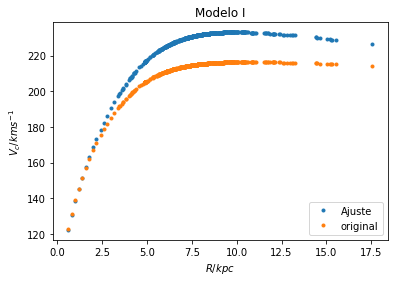

In [102]:
plt.plot(vecRp,Vc_tot_R_d_I(vecRp,np.asscalar(LS_R_d_I.x)),'.',label='Ajuste')
plt.plot(vecRp,Vc_tot_I,'.',label='original')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('Modelo I')
plt.legend(loc='lower right', prop={'size':10})
plt.savefig('Fit_R_d_I.pdf')

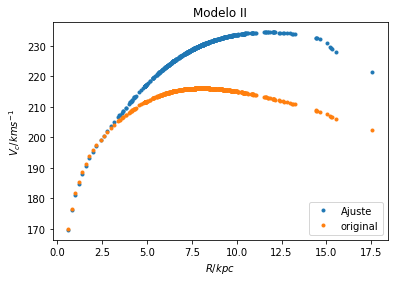

In [104]:
plt.plot(vecRp,Vc_tot_R_d_II(vecRp,np.asscalar(LS_R_d_II.x)),'.',label='Ajuste')
plt.plot(vecRp,Vc_tot_II,'.',label='original')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('Modelo II')
plt.legend(loc='lower right', prop={'size':10})
plt.savefig('Fit_R_d_II.pdf')

$\Sigma_{d}$

In [110]:
def Vc_tot_Sigma_d_I(R,param):
    Sigma_d_SD = param
    suma = Vc2_b_I + Vc2_DM_I + Vc2_SD_simps(R,R_d_I,Sigma_d_SD) + Vc2_ISM_I
    return np.sqrt(suma)

In [111]:
def Vc_tot_Sigma_d_II(R,param):
    Sigma_d_SD = param
    suma = Vc2_b_II + Vc2_DM_II + Vc2_SD_simps(R,R_d_II,Sigma_d_SD) + Vc2_ISM_II
    return np.sqrt(suma)

In [112]:
def Xi2_Sigma_d_I(parameters):
    Sigma_d_SD = np.exp(parameters)
    model = Vc_tot_Sigma_d_I(vecRp,Sigma_d_SD)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [113]:
def Xi2_Sigma_d_II(parameters):
    Sigma_d_SD = np.exp(parameters)
    model = Vc_tot_Sigma_d_II(vecRp,Sigma_d_SD)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [115]:
x0_Sigma_d = np.array(np.log(0.15e9))
LS_Sigma_d_I = minimize(Xi2_Sigma_d_I,x0_Sigma_d,method='L-BFGS-B',bounds=((np.log(0.15e9),np.log(3.0e9)),))
print LS_Sigma_d_I

      fun: 2570.7514262513205
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00013642])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 22
      nit: 5
   status: 0
  success: True
        x: array([21.36789835])


In [116]:
LS_Sigma_d_II = minimize(Xi2_Sigma_d_II,x0_Sigma_d,method='L-BFGS-B',bounds=((np.log(0.15e9),np.log(3.0e9)),))
print LS_Sigma_d_II

      fun: 2265.154336768537
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00077307])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 20
      nit: 5
   status: 0
  success: True
        x: array([20.23855419])


In [117]:
print np.exp(LS_Sigma_d_I.x),np.exp(LS_Sigma_d_II.x)

[1.90528673e+09] [6.15874762e+08]


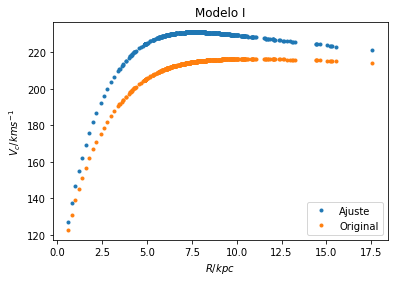

In [118]:
plt.plot(vecRp,Vc_tot_Sigma_d_I(vecRp,np.asscalar(np.exp(LS_Sigma_d_I.x))),'.',label='Ajuste')
plt.plot(vecRp,Vc_tot_I,'.',label='Original')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('Modelo I')
plt.legend(loc='lower right', prop={'size':10})
plt.savefig('Fit_Sigma_d_I.pdf')

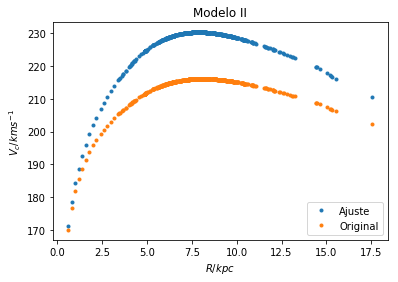

In [119]:
plt.plot(vecRp,Vc_tot_Sigma_d_II(vecRp,np.asscalar(np.exp(LS_Sigma_d_II.x))),'.',label='Ajuste')
plt.plot(vecRp,Vc_tot_II,'.',label='Original')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('Modelo II')
plt.legend(loc='lower right', prop={'size':10})
plt.savefig('Fit_Sigma_d_II.pdf')

$\Sigma_{g}$

In [120]:
def Vc_tot_Sigma_g_I(R,param):
    Sigma_g_ISM = param
    suma = Vc2_b_I + Vc2_DM_I + Vc2_SD_I + Vc2_ISM(R,R_d_I,Sigma_g_ISM)
    return np.sqrt(suma)

In [121]:
def Vc_tot_Sigma_g_II(R,param):
    Sigma_g_ISM = param
    suma = Vc2_b_II + Vc2_DM_II + Vc2_SD_II + Vc2_ISM(R,R_d_II,Sigma_g_ISM)
    return np.sqrt(suma)

In [122]:
def Xi2_Sigma_g_I(parameters):
    Sigma_g_ISM = np.exp(parameters)
    model = Vc_tot_Sigma_g_I(vecRp,Sigma_g_ISM)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [123]:
def Xi2_Sigma_g_II(parameters):
    Sigma_g_ISM = np.exp(parameters)
    model = Vc_tot_Sigma_g_II(vecRp,Sigma_g_ISM)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [124]:
x0_Sigma_g = np.array(np.log(1.0e8))
LS_Sigma_g_I = minimize(Xi2_Sigma_g_I,x0_Sigma_g,method='L-BFGS-B',bounds=((np.log(1.0e8),np.log(20.0e8)),))
print LS_Sigma_g_I

      fun: 3226.1629486152788
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 20
      nit: 5
   status: 0
  success: True
        x: array([20.83104254])


In [125]:
LS_Sigma_g_II = minimize(Xi2_Sigma_g_II,x0_Sigma_g,method='L-BFGS-B',bounds=((np.log(1.0e8),np.log(20.0e8)),))
print LS_Sigma_g_II

      fun: 2486.0039212887727
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 20
      nit: 5
   status: 0
  success: True
        x: array([19.97104902])


In [126]:
print np.exp(LS_Sigma_g_I.x),np.exp(LS_Sigma_g_II.x)

[1.113799e+09] [4.71320564e+08]


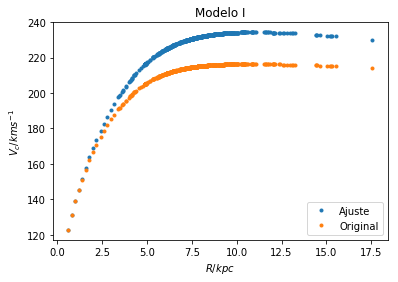

In [127]:
plt.plot(vecRp,Vc_tot_Sigma_g_I(vecRp,np.asscalar(np.exp(LS_Sigma_g_I.x))),'.',label='Ajuste')
plt.plot(vecRp,Vc_tot_I,'.',label='Original')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('Modelo I')
plt.legend(loc='lower right', prop={'size':10})
plt.savefig('Fit_Sigma_g_I.pdf')

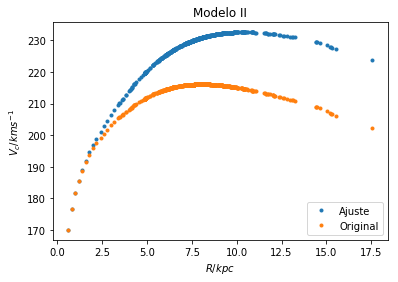

In [128]:
plt.plot(vecRp,Vc_tot_Sigma_g_II(vecRp,np.asscalar(np.exp(LS_Sigma_g_II.x))),'.',label='Ajuste')
plt.plot(vecRp,Vc_tot_II,'.',label='Original')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('Modelo II')
plt.legend(loc='lower right', prop={'size':10})
plt.savefig('Fit_Sigma_g_II.pdf')

# Dos parámetros

$a_{h}$ y $\rho_{h}$

In [129]:
def Vc_tot_a_h_rho_h_I(R,params):
    a_h,rho_h = params
    suma = Vc2_b_I + Vc2_DM(R,a_h,rho_h,alpha_h_I,beta_h_I) + Vc2_SD_I + Vc2_ISM_I
    return np.sqrt(suma)

In [130]:
def Vc_tot_a_h_rho_h_II(R,params):
    a_h,rho_h = params
    suma = Vc2_b_II + Vc2_DM(R,a_h,rho_h,alpha_h_II,beta_h_II) +Vc2_SD_II + Vc2_ISM_II
    return np.sqrt(suma)

In [131]:
def Xi2_a_h_rho_h_I(parameters):
    a_h,rho_h = parameters
    par = a_h,np.exp(rho_h)
    model = Vc_tot_a_h_rho_h_I(vecRp,par)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [132]:
def Xi2_a_h_rho_h_II(parameters):
    a_h,rho_h = parameters
    par = a_h,np.exp(rho_h)
    model = Vc_tot_a_h_rho_h_II(vecRp,par)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [138]:
x0_a_h_rho_h = np.array([1.0,np.log(1.0e8)])
LS_a_h_rho_h_I = minimize(Xi2_a_h_rho_h_I,x0_a_h_rho_h,method='L-BFGS-B',bounds=((1.,9.),(np.log(0.1e8),np.log(300.0e8)),))
print LS_a_h_rho_h_I

      fun: 2520.0713647512684
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-9.09494702e-05, -4.54747351e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 105
      nit: 24
   status: 0
  success: True
        x: array([ 1.32637895, 22.1557697 ])


In [139]:
pars_a_h_rho_h_I_min = np.array([LS_a_h_rho_h_I.x[0],np.exp(LS_a_h_rho_h_I.x[1])])
print pars_a_h_rho_h_I_min

[1.32637895e+00 4.18917520e+09]


In [140]:
LS_a_h_rho_h_II = minimize(Xi2_a_h_rho_h_II,x0_a_h_rho_h,method='L-BFGS-B',bounds=((1.,9.),(np.log(0.1e8),np.log(20.0e8)),))
print LS_a_h_rho_h_II

      fun: 2257.7286794271035
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.29581315, -0.22937456])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 135
      nit: 30
   status: 0
  success: True
        x: array([ 1.51448883, 20.03241529])


In [141]:
pars_a_h_rho_h_II_min = np.array([LS_a_h_rho_h_II.x[0],np.exp(LS_a_h_rho_h_II.x[1])])
print pars_a_h_rho_h_II_min

[1.51448883e+00 5.01149638e+08]


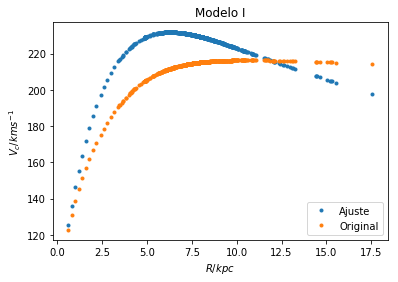

In [142]:
plt.plot(vecRp,Vc_tot_a_h_rho_h_I(vecRp,pars_a_h_rho_h_I_min),'.',label='Ajuste')
plt.plot(vecRp,Vc_tot_I,'.',label='Original')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('Modelo I')
plt.legend(loc='lower right', prop={'size':10})
plt.savefig('Fit_a_h_rho_h_I.pdf')

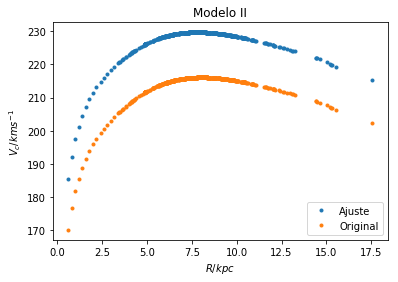

In [143]:
plt.plot(vecRp,Vc_tot_a_h_rho_h_II(vecRp,pars_a_h_rho_h_II_min),'.',label='Ajuste')
plt.plot(vecRp,Vc_tot_II,'.',label='Original')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('Modelo II')
plt.legend(loc='lower right', prop={'size':10})
plt.savefig('Fit_a_h_rho_h_II.pdf')

# Tres parámetros, bulbo y halo de materia oscura

$a_{h}$, $\rho_{h}$ y $\rho_{b}$

Modelo I

In [150]:
def Vc_tot_a_h_rho_h_rho_b_I(R,params,parameters):
    a_h,rho_h,rho_b = params
    alpha_h,beta_h= parameters
    suma = Vc2_b(R,rho_b) + Vc2_DM(R,a_h,rho_h,alpha_h,beta_h) + Vc2_SD_I + Vc2_ISM_I
    return np.sqrt(suma)

In [151]:
par_wo_a_h_rho_h_rho_b_I = np.array([alpha_h_I,beta_h_I])
par_wo_a_h_rho_h_rho_b_II = np.array([alpha_h_II,beta_h_II])
par_wo_a_h_rho_h_rho_b_NFW = np.array([1.,3.])

In [152]:
def Xi2_a_rho_h_rho_b_I(parameters):
    a_h,rho_h,rho_b = parameters
    par = a_h,np.exp(rho_h),np.exp(rho_b)
    model = Vc_tot_a_h_rho_h_rho_b_I(vecRp,par,par_wo_a_h_rho_h_rho_b_I)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [153]:
x0_a_rho_h_rho_b = np.array([0.01,np.log(1.0e8),np.log(1.0e8)])
LS_a_rho_h_rho_b_I = minimize(Xi2_a_rho_h_rho_b_I,x0_a_rho_h_rho_b,method='L-BFGS-B',bounds=((1.,9.),(np.log(0.1e8),np.log(20.0e8)),(np.log(1.0e8),np.log(30.0e8)),))
print LS_a_rho_h_rho_b_I

      fun: 2205.3938880068736
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.00000000e+00, 0.00000000e+00, 4.54747351e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 144
      nit: 27
   status: 0
  success: True
        x: array([ 2.62194958, 20.94276355, 20.71227158])


In [154]:
pars_a_rho_h_rho_b_min_I = np.array([LS_a_rho_h_rho_b_I.x[0],np.exp(LS_a_rho_h_rho_b_I.x[1]),np.exp(LS_a_rho_h_rho_b_I.x[2])])
print pars_a_rho_h_rho_b_min_I

[2.62194958e+00 1.24545100e+09 9.89065955e+08]


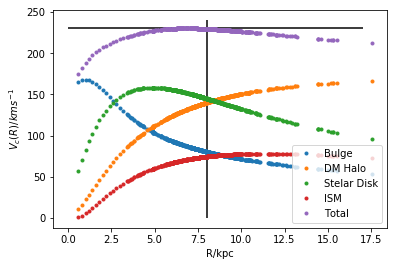

In [155]:
plt.plot(vecRp,np.sqrt(Vc2_b(vecRp,np.asscalar(np.exp(LS_a_rho_h_rho_b_I.x[2])))),'.',label='Bulge')
plt.plot(vecRp,np.sqrt(Vc2_DM(vecRp,np.asscalar(LS_a_rho_h_rho_b_I.x[0]),np.asscalar(np.exp(LS_a_rho_h_rho_b_I.x[1])),alpha_h_I,beta_h_I)),'.',label='DM Halo')
plt.plot(vecRp,np.sqrt(Vc2_SD_I),'.',label='Stelar Disk')
plt.plot(vecRp,np.sqrt(Vc2_ISM_I),'.',label='ISM')
plt.plot(vecRp,Vc_tot_a_h_rho_h_rho_b_I(vecRp,pars_a_rho_h_rho_b_min_I,par_wo_a_h_rho_h_rho_b_I),'.',label='Total')
plt.xlabel('R/kpc')
plt.ylabel(r'$V_{c}(R)/kms^{-1}$')
plt.legend(loc='lower right', prop={'size':10})
plt.hlines(230,0,17)
plt.vlines(8,0,240)
plt.savefig('Fit_rho_b_rho_h_a_h_I_v2.pdf')

Modelo II

In [156]:
def Vc_tot_a_h_rho_h_rho_b_II(R,params,parameters):
    a_h,rho_h,rho_b = params
    alpha_h,beta_h= parameters
    suma = Vc2_b(R,rho_b) + Vc2_DM(R,a_h,rho_h,alpha_h,beta_h) + Vc2_SD_II + Vc2_ISM_II
    return np.sqrt(suma)

In [157]:
def Xi2_a_rho_h_rho_b_II(parameters):
    a_h,rho_h,rho_b = parameters
    par = a_h,np.exp(rho_h),np.exp(rho_b)
    model = Vc_tot_a_h_rho_h_rho_b_II(vecRp,par,par_wo_a_h_rho_h_rho_b_II)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [158]:
x0_a_rho_h_rho_b_II = np.array([0.01,np.log(1.0e8),np.log(1.0e8)])

In [159]:
LS_a_rho_h_rho_b_II = minimize(Xi2_a_rho_h_rho_b_II,x0_a_rho_h_rho_b_II,method='L-BFGS-B',bounds=((1.,9.),(np.log(0.1e8),np.log(20.0e8)),(np.log(1.0e8),np.log(30.0e8)),))
print LS_a_rho_h_rho_b_II

      fun: 2246.5087437860802
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([2.37907443e+01, 1.71894499e-02, 4.09272616e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 348
      nit: 61
   status: 0
  success: True
        x: array([ 1.        , 20.90012374, 18.65825116])


In [160]:
pars_a_rho_h_rho_b_min_II = np.array([LS_a_rho_h_rho_b_II.x[0],np.exp(LS_a_rho_h_rho_b_II.x[1]),np.exp(LS_a_rho_h_rho_b_II.x[2])])
print pars_a_rho_h_rho_b_min_II

[1.00000000e+00 1.19346149e+09 1.26816429e+08]


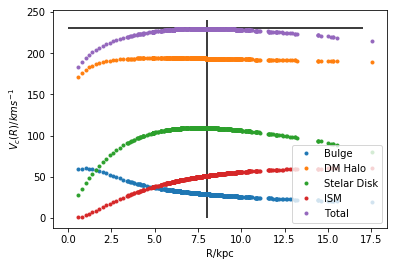

In [162]:
plt.plot(vecRp,np.sqrt(Vc2_b(vecRp,np.asscalar(np.exp(LS_a_rho_h_rho_b_II.x[2])))),'.',label='Bulge')
plt.plot(vecRp,np.sqrt(Vc2_DM(vecRp,np.asscalar(LS_a_rho_h_rho_b_II.x[0]),np.asscalar(np.exp(LS_a_rho_h_rho_b_II.x[1])),alpha_h_II,beta_h_II)),'.',label='DM Halo')
plt.plot(vecRp,np.sqrt(Vc2_SD_II),'.',label='Stelar Disk')
plt.plot(vecRp,np.sqrt(Vc2_ISM_II),'.',label='ISM')
plt.plot(vecRp,Vc_tot_a_h_rho_h_rho_b_II(vecRp,pars_a_rho_h_rho_b_min_II,par_wo_a_h_rho_h_rho_b_II),'.',label='Total')
plt.xlabel('R/kpc')
plt.ylabel(r'$V_{c}(R)/kms^{-1}$')
plt.legend(loc='lower right', prop={'size':10})
plt.hlines(230,0,17)
plt.vlines(8,0,240)
plt.savefig('Fit_rho_b_rho_h_a_h_II_v2.pdf')

NFW I

In [163]:
def Vc_tot_a_h_rho_h_rho_b_NFWI(R,params,parameters):
    a_h,rho_h,rho_b = params
    alpha_h,beta_h= parameters
    suma = Vc2_b(R,rho_b) + Vc2_DM(R,a_h,rho_h,alpha_h,beta_h) + Vc2_SD_I + Vc2_ISM_I
    return np.sqrt(suma)

In [164]:
def Xi2_a_rho_h_rho_b_NFWI(parameters):
    a_h,rho_h,rho_b = parameters
    par = a_h,np.exp(rho_h),np.exp(rho_b)
    model = Vc_tot_a_h_rho_h_rho_b_NFWI(vecRp,par,par_wo_a_h_rho_h_rho_b_NFW)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [184]:
x0_a_rho_h_rho_b_NFWI = np.array([1.,np.log(0.1e8),np.log(0.0001e8)])
LS_a_rho_h_rho_b_NFWI = minimize(Xi2_a_rho_h_rho_b_NFWI,x0_a_rho_h_rho_b_NFWI,method='L-BFGS-B',bounds=((1.,9.),(np.log(0.1e8),np.log(20.0e8)),(np.log(0.0001e8),np.log(30.0e8)),))
print LS_a_rho_h_rho_b_NFWI

      fun: 2684.55947039445
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.01678018,  0.02401066, -0.00873115])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 148
      nit: 24
   status: 0
  success: True
        x: array([ 3.05331675, 19.43317098,  9.4500881 ])


In [185]:
pars_a_rho_h_rho_b_min_NFWI = np.array([LS_a_rho_h_rho_b_NFWI.x[0],np.exp(LS_a_rho_h_rho_b_NFWI.x[1]),np.exp(LS_a_rho_h_rho_b_NFWI.x[2])])
print pars_a_rho_h_rho_b_min_NFWI

[3.05331675e+00 2.75244672e+08 1.27092848e+04]


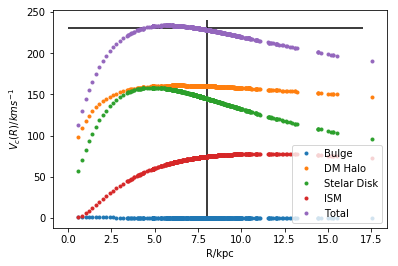

In [186]:
plt.plot(vecRp,np.sqrt(Vc2_b(vecRp,np.asscalar(np.exp(LS_a_rho_h_rho_b_NFWI.x[2])))),'.',label='Bulge')
plt.plot(vecRp,np.sqrt(Vc2_DM(vecRp,np.asscalar(LS_a_rho_h_rho_b_NFWI.x[0]),np.asscalar(np.exp(LS_a_rho_h_rho_b_NFWI.x[1])),1.,3.)),'.',label='DM Halo')
plt.plot(vecRp,np.sqrt(Vc2_SD_I),'.',label='Stelar Disk')
plt.plot(vecRp,np.sqrt(Vc2_ISM_I),'.',label='ISM')
plt.plot(vecRp,Vc_tot_a_h_rho_h_rho_b_NFWI(vecRp,pars_a_rho_h_rho_b_min_NFWI,par_wo_a_h_rho_h_rho_b_NFW),'.',label='Total')
plt.xlabel('R/kpc')
plt.ylabel(r'$V_{c}(R)/kms^{-1}$')
plt.legend(loc='lower right', prop={'size':10})
plt.hlines(230,0,17)
plt.vlines(8,0,240)
plt.savefig('Fit_rho_b_rho_h_a_h_NFWI_v2.pdf')

NFW II

In [169]:
def Vc_tot_a_h_rho_h_rho_b_NFWII(R,params,parameters):
    a_h,rho_h,rho_b = params
    alpha_h,beta_h= parameters
    suma = Vc2_b(R,rho_b) + Vc2_DM(R,a_h,rho_h,alpha_h,beta_h) + Vc2_SD_II + Vc2_ISM_II
    return np.sqrt(suma)

In [170]:
def Xi2_a_rho_h_rho_b_NFWII(parameters):
    a_h,rho_h,rho_b = parameters
    par = a_h,np.exp(rho_h),np.exp(rho_b)
    model = Vc_tot_a_h_rho_h_rho_b_NFWII(vecRp,par,par_wo_a_h_rho_h_rho_b_NFW)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [171]:
x0_a_rho_h_rho_b_NFWII = np.array([0.01,np.log(1.0e8),np.log(1.0e8)])
LS_a_rho_h_rho_b_NFWII = minimize(Xi2_a_rho_h_rho_b_NFWII,x0_a_rho_h_rho_b_NFWII,method='L-BFGS-B',bounds=((1.,15.),(np.log(0.1e8),np.log(20.0e8)),(np.log(1.0e8),np.log(30.0e8)),))
print LS_a_rho_h_rho_b_NFWII

      fun: 2268.4462559502604
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00113687, -0.00222826, -0.00059117])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 204
      nit: 41
   status: 0
  success: True
        x: array([ 4.48867096, 18.92340689, 20.41992984])


In [172]:
pars_a_rho_h_rho_b_min_NFWII = np.array([LS_a_rho_h_rho_b_NFWII.x[0],np.exp(LS_a_rho_h_rho_b_NFWII.x[1]),np.exp(LS_a_rho_h_rho_b_NFWII.x[2])])
print pars_a_rho_h_rho_b_min_NFWII

[4.48867096e+00 1.65322206e+08 7.38350975e+08]


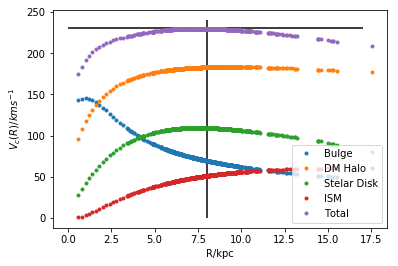

In [174]:
plt.plot(vecRp,np.sqrt(Vc2_b(vecRp,np.asscalar(np.exp(LS_a_rho_h_rho_b_NFWII.x[2])))),'.',label='Bulge')
plt.plot(vecRp,np.sqrt(Vc2_DM(vecRp,np.asscalar(LS_a_rho_h_rho_b_NFWII.x[0]),np.asscalar(np.exp(LS_a_rho_h_rho_b_NFWII.x[1])),1.,3.)),'.',label='DM Halo')
plt.plot(vecRp,np.sqrt(Vc2_SD_II),'.',label='Stelar Disk')
plt.plot(vecRp,np.sqrt(Vc2_ISM_II),'.',label='ISM')
plt.plot(vecRp,Vc_tot_a_h_rho_h_rho_b_NFWII(vecRp,pars_a_rho_h_rho_b_min_NFWII,par_wo_a_h_rho_h_rho_b_NFW),'.',label='Total')
plt.xlabel('R/kpc')
plt.ylabel(r'$V_{c}(R)/kms^{-1}$')
plt.legend(loc='lower right', prop={'size':10})
plt.hlines(230,0,17)
plt.vlines(8,0,240)
plt.savefig('Fit_rho_b_rho_h_a_h_NFWII_v2.pdf')

# Ajuste del perfil de materia oscura de campo escalar

In [187]:
def M_minor(r,rho_sol,m_a):
    rsol = ((rho_sol/2.42e9)*(m_a/1.0e-22)**2.)**(-0.25)
    n = 3465.*r**13.*rsol + 23100.*r**11.*rsol**3. + 65373.*r**9.*rsol**5. + 101376.*r**7.*rsol**7. + 92323.*r**5.*rsol**9. + 48580.*r**3.*rsol**11. + 3465.*(r**2.+rsol**2.)**7.*np.arctan(r/rsol) - 3465.*r*rsol**13.
    d = (r**2. +rsol**2.)**7.
    const = 4.*np.pi*rho_sol*rsol**3./215040.
    return const*n/d

In [188]:
def M_mayor(r,rho_sol,m_a,eps,r_s):
    rsol = ((rho_sol/2.42e9)*(m_a/1.0e-22)**2.)**(-0.25)
    r_eps = rsol*np.sqrt(eps**(-1./8.) - 1.)
    delta_NFW = eps*r_eps*(r_s + r_eps)**2./r_s**3.
    t1 = np.log(r + r_s) + r_s/(r+r_s) -np.log(r_s +r_eps) - r_s/(r_s+r_eps)#- np.log(r_s) - 1.
    constant = 4.*np.pi*rho_sol*delta_NFW*r_s**3.
    n2 = 3465.*r_eps**13.*rsol + 23100.*r_eps**11.*rsol**3. + 65373.*r_eps**9.*rsol**5. + 101376.*r_eps**7.*rsol**7. + 92323.*r_eps**5.*rsol**9. + 48580.*r_eps**3.*rsol**11. + 3465.*(r_eps**2.+rsol**2.)**7.*np.arctan(r_eps/rsol) - 3465.*r_eps*rsol**13.
    d2 = (r_eps**2. +rsol**2.)**7.
    const2 = 4.*np.pi*rho_sol*rsol**3./215040.
    return constant*t1 + const2*n2/d2

In [189]:
def vc2_DM_axion(r,rho_sol,m_a,eps,r_s):
    rsol = ((rho_sol/(2.42e9))*(m_a/1.0e-22)**2.)**(-0.25)
    r_eps = rsol*np.sqrt(eps**(-1./8.) - 1.)
    result = []
    for i in range(0,len(r)):
        if r[i]<r_eps:
            result.append(G*M_minor(r[i],rho_sol,m_a)/r[i])
        else:
            result.append(G*M_mayor(r[i],rho_sol,m_a,eps,r_s)/r[i])
    return np.array(result)

In [190]:
def Vc_tot_rho_sol_m_a_eps_r_s_I(r,params):
    rho_sol,m_a,eps,r_s = params
    suma = Vc2_b_I + vc2_DM_axion(r,rho_sol,m_a,eps,r_s) + Vc2_SD_I + Vc2_ISM_I
    return np.sqrt(suma)

In [191]:
def Xi2_rho_sol_m_a_r_s_epsI(parameters):
    rho_sol,m_a,eps,r_s = parameters
    par = np.exp(rho_sol),np.exp(m_a),eps,r_s
    model = Vc_tot_rho_sol_m_a_eps_r_s_I(vecRp,par)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [194]:
x0_rho_sol_m_a_r_s_epsI = np.array([np.log(1.0e10),np.log(1.0e-21),0.001,5.0])
LS_rho_sol_m_a_r_s_epsI_TNC = minimize(Xi2_rho_sol_m_a_r_s_epsI,x0_rho_sol_m_a_r_s_epsI,method='TNC',bounds=((np.log(1.0e10),np.log(9.0e11)),(np.log(1.0e-21),np.log(1.0e-20)),(0.001,0.1),(5.0,10.0),))
print LS_rho_sol_m_a_r_s_epsI_TNC

     fun: 2391.0231310333215
     jac: array([ -38.07563189,   29.76398719, -696.15148277,  -26.49835551])
 message: 'Max. number of function evaluations reached'
    nfev: 100
     nit: 17
  status: 3
 success: False
       x: array([ 24.87120166, -48.33696668,   0.05521332,   6.28756009])


In [195]:
pars_rho_sol_m_a_r_s_epsI_min = np.array([np.exp(LS_rho_sol_m_a_r_s_epsI_TNC.x[0]),np.exp(LS_rho_sol_m_a_r_s_epsI_TNC.x[1]),LS_rho_sol_m_a_r_s_epsI_TNC.x[2],LS_rho_sol_m_a_r_s_epsI_TNC.x[3]])
print pars_rho_sol_m_a_r_s_epsI_min

[6.33031963e+10 1.01747113e-21 5.52133212e-02 6.28756009e+00]


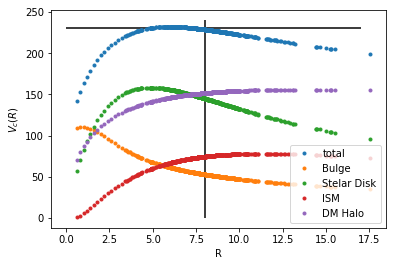

In [197]:
plt.plot(vecRp,Vc_tot_rho_sol_m_a_eps_r_s_I(vecRp,pars_rho_sol_m_a_r_s_epsI_min),'.', label='total')
plt.plot(vecRp,np.sqrt(Vc2_b_I),'.',label='Bulge')
plt.plot(vecRp,np.sqrt(Vc2_SD_I),'.',label='Stelar Disk')
plt.plot(vecRp,np.sqrt(Vc2_ISM_I),'.',label='ISM')
plt.plot(vecRp,np.sqrt(vc2_DM_axion(vecRp,rho_sol=np.asscalar(np.exp(LS_rho_sol_m_a_r_s_epsI_TNC.x[0])),m_a=np.asscalar(np.exp(LS_rho_sol_m_a_r_s_epsI_TNC.x[1])),eps=np.asscalar(LS_rho_sol_m_a_r_s_epsI_TNC.x[2]),r_s=np.asscalar(LS_rho_sol_m_a_r_s_epsI_TNC.x[3]))),'.',label='DM Halo')
plt.xlabel('R')
plt.ylabel(r'$V_{c}(R)$')
plt.legend(loc='lower right', prop={'size':10})
plt.hlines(230,0,17)
plt.vlines(8,0,240)
plt.savefig('Fit_DMSF_I_TNC_v2.pdf')

Modelo II

In [199]:
def Vc_tot_rho_sol_m_a_eps_r_s_II(r,params):
    rho_sol,m_a,eps,r_s = params
    suma = Vc2_b_II + vc2_DM_axion(r,rho_sol,m_a,eps,r_s) + Vc2_SD_II + Vc2_ISM_II
    return np.sqrt(suma)

In [200]:
def Xi2_rho_sol_m_a_r_s_epsII(parameters):
    rho_sol,m_a,eps,r_s = parameters
    par = np.exp(rho_sol),np.exp(m_a),eps,r_s
    model = Vc_tot_rho_sol_m_a_eps_r_s_II(vecRp,par)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [201]:
x0_rho_sol_m_a_r_s_epsII = np.array([np.log(1.0e10),np.log(1.0e-22),0.0000000000001,2.])
LS_rho_sol_m_a_r_s_epsII = minimize(Xi2_rho_sol_m_a_r_s_epsII,x0_rho_sol_m_a_r_s_epsII,method='L-BFGS-B',bounds=((np.log(1.0e10),np.log(9.0e13)),(np.log(1.0e-22),np.log(1.0e-20)),(0.0000000000001,0.1),(2.0,5.0),))
print LS_rho_sol_m_a_r_s_epsII

      fun: 2320.981891789851
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -208.78387659,   195.9455858 , -2090.57398024,  -266.53142413])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 250
      nit: 36
   status: 0
  success: True
        x: array([ 24.41973857, -50.6088541 ,   0.0947956 ,   2.32400873])


In [202]:
pars_rho_sol_m_a_r_s_epsII_min = np.array([np.exp(LS_rho_sol_m_a_r_s_epsII.x[0]),np.exp(LS_rho_sol_m_a_r_s_epsII.x[1]),LS_rho_sol_m_a_r_s_epsII.x[2],LS_rho_sol_m_a_r_s_epsII.x[3]])
print pars_rho_sol_m_a_r_s_epsII_min

[4.03048872e+10 1.04918948e-22 9.47955966e-02 2.32400873e+00]


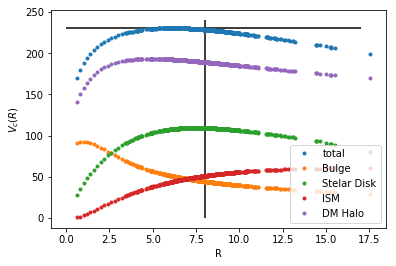

In [203]:
plt.plot(vecRp,Vc_tot_rho_sol_m_a_eps_r_s_II(vecRp,pars_rho_sol_m_a_r_s_epsII_min),'.', label='total')
plt.plot(vecRp,np.sqrt(Vc2_b_II),'.',label='Bulge')
plt.plot(vecRp,np.sqrt(Vc2_SD_II),'.',label='Stelar Disk')
plt.plot(vecRp,np.sqrt(Vc2_ISM_II),'.',label='ISM')
plt.plot(vecRp,np.sqrt(vc2_DM_axion(vecRp,rho_sol=np.asscalar(np.exp(LS_rho_sol_m_a_r_s_epsII.x[0])),m_a=np.asscalar(np.exp(LS_rho_sol_m_a_r_s_epsII.x[1])),eps=np.asscalar(LS_rho_sol_m_a_r_s_epsII.x[2]),r_s=np.asscalar(LS_rho_sol_m_a_r_s_epsII.x[3]))),'.',label='DM Halo')
plt.xlabel('R')
plt.ylabel(r'$V_{c}(R)$')
plt.legend(loc='lower right', prop={'size':10})
plt.hlines(230,0,17)
plt.vlines(8,0,240)
plt.savefig('Fit_DMSF_II_BFGS_v2.pdf')